Case a55 - Estagiário de Business Inteligence
Nome: Alessandro Melo de Oliveira

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_table("data.txt.txt")
raw_data["data"] = raw_data["data"].astype("datetime64")

In [3]:
full_data = raw_data.copy()
full_data['month'] = [i.month_name() for i in full_data['data']]
full_data['day'] = [i.day for i in full_data['data']]
full_data['year'] = [i.year for i in full_data['data']]
full_data['week'] = [i.day_name() for i in full_data['data']]

In [4]:
full_data.head(2)

,data,cnpj_loja,nome_loja,qtd cupom,valor venda,qtd venda,month,day,year,week
0,2019-12-26,276780000320,Loja 1,1,4974.51,274.0,December,26,2019,Thursday
1,2019-12-31,276780000320,Loja 1,1,1953.04,169.0,December,31,2019,Tuesday


#### 1 - Utilizando gráficos, demonstre um ranking das lojas com maior quantidade de vendas ao longo do período crescente (nov/2019 , dez/2019)

In [5]:
full_data_period = full_data[full_data['month'].str.contains("December|November")].sort_values("month")
full_data_december = full_data_period[full_data_period['month'] == "December"]
full_data_november = full_data_period[full_data_period['month'] == "November"]

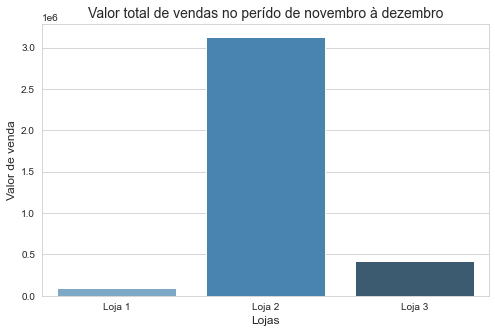

In [6]:
fig_vendas_total = plt.figure(figsize=(8,5))

ax_vendas_total = sns.barplot(
                x=full_data_period.groupby(["nome_loja"]).sum().index, 
                y=full_data_period.groupby(["nome_loja"]).sum()['valor venda'],
                palette="Blues_d")

plt.xlabel("Lojas", fontsize = 12)
plt.ylabel("Valor de venda", fontsize = 12)
plt.title("Valor total de vendas no perído de novembro à dezembro", fontsize = 14)
plt.savefig("vendas_totais_periodo.png")
plt.show()

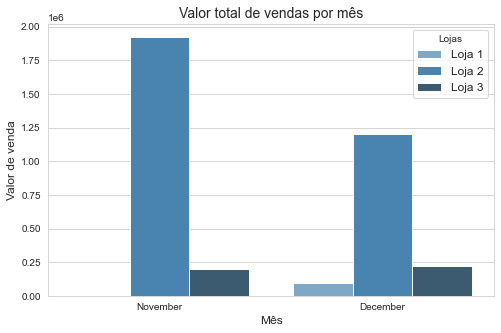

In [7]:
fig_vendas_total_meses = plt.figure(figsize=(8,5))
ax_vendas_total_meses = sns.barplot(x="month", 
                 y="valor venda", 
                 hue="nome_loja", 
                 data=full_data_period,
                order=["November", "December"],
                palette="Blues_d",
                estimator=sum,
                ci=None)

legend_labels, _= ax_vendas_total_meses.get_legend_handles_labels()
ax_vendas_total_meses.legend(legend_labels, ['Loja 1','Loja 2','Loja 3'], 
          bbox_to_anchor=(1,1), 
          title='Lojas',
         fontsize = 12)


plt.xlabel("Mês", fontsize = 12)
plt.ylabel("Valor de venda", fontsize = 12)
plt.title("Valor total de vendas por mês", fontsize = 14)
plt.savefig("vendas_totais_por_mes.png")
plt.show()

In [8]:
dict_mean_revenue_percent = {
    "Loja 1":None,
    "Loja 2":None,
    "Loja 3":None
}

for loja in list(full_data_period['nome_loja'].unique()):
    revenue_november = full_data_period[(full_data_period['nome_loja'] == loja) & (full_data_period['month'] == 'November')]['valor venda'].sum()
    revenue_december = full_data_period[(full_data_period['nome_loja'] == loja) & (full_data_period['month'] == 'December')]['valor venda'].sum()

    percent = 100*(revenue_december - revenue_november)/revenue_november
    
    dict_mean_revenue_percent[loja] = percent
    
variacao_vendas_annotate = f"Variação percentual \n" + f"Loja 2: {round(dict_mean_revenue_percent['Loja 2'],2)}%\n" + f"Loja 3: {round(dict_mean_revenue_percent['Loja 3'],2)}%"

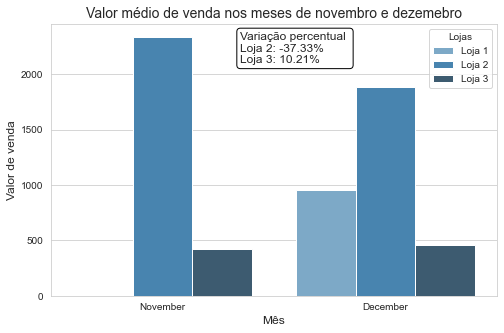

In [9]:
fig_vendas_media = plt.figure(figsize=(8,5))
ax = sns.barplot(x="month", 
                 y="valor venda", 
                 hue="nome_loja", 
                 data=full_data_period,
                order=["November", "December"],
                palette="Blues_d",
                ci  =False)

plt.annotate(variacao_vendas_annotate, 
             (0.35,2100),
             fontsize = 12,
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Loja 1','Loja 2','Loja 3'], 
          bbox_to_anchor=(1,1), 
          title='Lojas')


plt.xlabel("Mês", fontsize = 12)
plt.ylabel("Valor de venda", fontsize = 12)
plt.title("Valor médio de venda nos meses de novembro e dezemebro", fontsize = 14)
plt.savefig("media_vendas_totais_por_mes_por_loja.png")
plt.show()

In [10]:
data_loja_1 = full_data_period[full_data_period['nome_loja'] == 'Loja 1']
data_loja_2 = full_data_period[full_data_period['nome_loja'] == 'Loja 2']
data_loja_3 = full_data_period[full_data_period['nome_loja'] == 'Loja 3']

#### 2- Utilizando gráficos, demonstre um ranking das lojas com maior numero de cupoms ao longo do período crescente (nov/2019 , dez/2019)

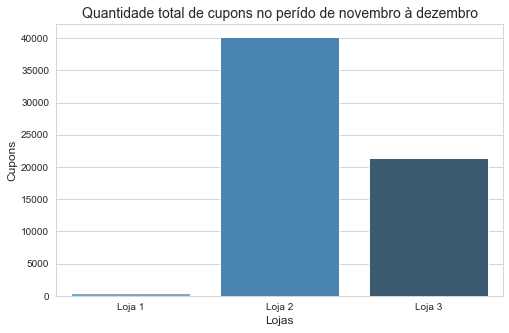

In [11]:
fig_cupons_total = plt.figure(figsize=(8,5))
ax_cupons_total = sns.barplot(
                x=full_data_period.groupby(["nome_loja"]).sum().index, 
                 y=full_data_period.groupby(["nome_loja"]).sum()['qtd cupom'],
                palette="Blues_d")

plt.xlabel("Lojas", fontsize = 12)
plt.ylabel("Cupons", fontsize = 12)
plt.title("Quantidade total de cupons no perído de novembro à dezembro", fontsize = 14)
plt.savefig("cupons_totais_periodo.png")
plt.show()

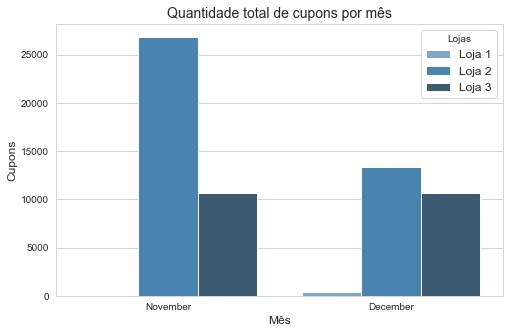

In [12]:
fig_qtd_cupons_meses = plt.figure(figsize=(8,5))
ax_qtd_cupons_meses = sns.barplot(x="month", 
                 y="qtd cupom", 
                 hue="nome_loja", 
                 data=full_data_period,
                order=["November", "December"],
                palette="Blues_d",
                estimator=sum,
                ci=None)

legend_labels, _= ax_vendas_total_meses.get_legend_handles_labels()
ax_qtd_cupons_meses.legend(legend_labels, ['Loja 1','Loja 2','Loja 3'], 
          bbox_to_anchor=(1,1), 
          title='Lojas',
         fontsize = 12)


plt.xlabel("Mês", fontsize = 12)
plt.ylabel("Cupons", fontsize = 12)
plt.title("Quantidade total de cupons por mês", fontsize = 14)
plt.savefig("cupons_totais_por_mes.png")
plt.show()

In [13]:
dict_coupons_percent = {
    "Loja 1":None,
    "Loja 2":None,
    "Loja 3":None
}

for loja in list(full_data_period['nome_loja'].unique()):
    coupons_november = full_data_period[(full_data_period['nome_loja'] == loja) & (full_data_period['month'] == 'November')]['qtd cupom'].sum()
    coupons_december = full_data_period[(full_data_period['nome_loja'] == loja) & (full_data_period['month'] == 'December')]['qtd cupom'].sum()

    percent = 100*(coupons_december - coupons_november)/coupons_november
    
    dict_coupons_percent[loja] = percent
    
variacao_cupons_annotate = f"Variação percentual \n" + f"Loja 2: {round(dict_coupons_percent['Loja 2'],2)}%\n" + f"Loja 3: {round(dict_coupons_percent['Loja 3'],2)}%"

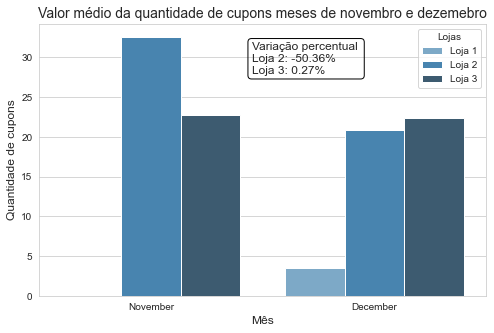

In [14]:
fig_cupons = plt.figure(figsize=(8,5))
ax = sns.barplot(x="month", 
                 y="qtd cupom", 
                 hue="nome_loja", 
                 data=full_data_period,
                order=["November", "December"],
                palette="Blues_d",
                ci = False)

plt.annotate(variacao_cupons_annotate, 
             (0.45,28), 
             fontsize = 12,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'))

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Loja 1','Loja 2','Loja 3'], 
          bbox_to_anchor=(1,1), 
          title='Lojas')



plt.xlabel("Mês", fontsize = 12)
plt.ylabel("Quantidade de cupons", fontsize = 12)
plt.title("Valor médio da quantidade de cupons meses de novembro e dezemebro", fontsize = 14)
plt.savefig("quantidade_media_cupons_por_loja_por_mes.png")
plt.show()

#### 3 - Existe relação direta entre os 2 gráficos gerados? Justifique

Existem sim. 

Pelos gráficos, pode-se notar que a base de clientes da loja 2 é muito mais sensítivel ao número de cupons.
Do mês de novembro para dezembro, houve uma redução média de 50% do número de cupons na loja 2, ocasionando uma queda média de -37% do valor de vendas.

Por outro lado, a base de clientes da loja 3 é mais fiel, variando pouco o valor de venda mesmo quando ocorre pouco aumento no número de cupons. De novebro para dezembro, praticamente não houve aumento no número de cupons, porém o número de vendas teve um aumento médio de 10%, indicando se tratar de uma base de clientes insensíveis a tais promoções.

Por fim, a loja 1 começou a operar apenas no mês de dezembro, já com implementação de cupons. No referido mês, ela já se posicionou em segundo no ranking de vendas médias, com quase o dobro de vendas médias da loja 3, mesmo oferendo uma média 6x menor no número de cupons (85% menos cupons para ser exato).

Resumidamente, temos:

Comparando as três lojas, a loja 1 teve um ótimo ínicio de operações, conseguindo um considerável número de vendas mesmo com uma política baixa no número de cupons. A loja 3 possui uma base de clientes mais fiéis, no sentido de que a média de vendas consegue crescer mesmo sem aumentar o número de cupons. Por fim, a loja 2 possui maior volume de operações (58% do total dos registros), o que explica o maior volume de vendas e cupons encontrados nos gráficos. Entretanto, a base de clientes é mais suscetível a quantidade de cupons oferecidas.